In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings

In [2]:
# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("vgsales.csv")

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Checking type of each column for this dataset

In [6]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [7]:
df= df.sort_values(by="Global_Sales", ascending = False)

In [8]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [9]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Checking missing values

In [10]:
df.shape

(16719, 16)

In [11]:
# Replace missing values for numerical columns with mean
numerical_columns = ['Critic_Score', 'Critic_Count', 'User_Count']
for column in numerical_columns:
    if df[column].dtype != 'object':  # Checking if the column is numeric
        
            # Replace missing values with the mean
            df[column].fillna(df[column].mean(), inplace=True)


Replacing numerical missing vlaues per Mean of it

In [12]:
# We will replace NaN values in the 'Developer' column with "Unknown"
df_filled = df.copy()
df_filled['Developer'].fillna('Unknown', inplace=True)

# Verify if the missing values have been replaced
df_filled[df_filled['Developer'] == 'Unknown'].head(), df_filled['Developer'].isnull().sum()

(                        Name Platform  Year_of_Release         Genre  \
 1          Super Mario Bros.      NES           1985.0      Platform   
 4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
 5                     Tetris       GB           1989.0        Puzzle   
 9                  Duck Hunt      NES           1984.0       Shooter   
 10                Nintendogs       DS           2005.0    Simulation   
 
    Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
 1   Nintendo     29.08      3.58      6.81         0.77         40.24   
 4   Nintendo     11.27      8.89     10.22         1.00         31.37   
 5   Nintendo     23.20      2.26      4.22         0.58         30.26   
 9   Nintendo     26.93      0.63      0.28         0.47         28.31   
 10  Nintendo      9.05     10.95      1.93         2.74         24.67   
 
     Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
 1      68.967679     26.360821        N

In [13]:
# Replace missing values for categorical columns with mode
categorical_columns = ['Developer', 'Rating','User_Score']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

Replacing categorical missing values per the mode

In [14]:
df.isnull().sum()

Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score         0
Critic_Count         0
User_Score           0
User_Count           0
Developer            0
Rating               0
dtype: int64

checking the missing vlaues after replacing per mean and mode

In [15]:
df=df.dropna()

In [16]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

After drop the remaining missing values(choose this option because had just a small number of missing values if compared of the total)

In [17]:
df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'], format='%Y')


Replace the values to dates, with the previous values were impossible to know the release year of each game)

In [18]:
df.columns = df.columns.str.upper()

Change all the columns name for upper letter

In [19]:
df.head()

,NAME,PLATFORM,YEAR_OF_RELEASE,GENRE,PUBLISHER,NA_SALES,EU_SALES,JP_SALES,OTHER_SALES,GLOBAL_SALES,CRITIC_SCORE,CRITIC_COUNT,USER_SCORE,USER_COUNT,DEVELOPER,RATING
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,tbd,162.229908,Ubisoft,E
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.3,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,tbd,162.229908,Ubisoft,E


In [20]:
ps2 = df[df['PLATFORM']=='PS2']
ps2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 17 to 16294
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             2127 non-null   object        
 1   PLATFORM         2127 non-null   object        
 2   YEAR_OF_RELEASE  2127 non-null   datetime64[ns]
 3   GENRE            2127 non-null   object        
 4   PUBLISHER        2127 non-null   object        
 5   NA_SALES         2127 non-null   float64       
 6   EU_SALES         2127 non-null   float64       
 7   JP_SALES         2127 non-null   float64       
 8   OTHER_SALES      2127 non-null   float64       
 9   GLOBAL_SALES     2127 non-null   float64       
 10  CRITIC_SCORE     2127 non-null   float64       
 11  CRITIC_COUNT     2127 non-null   float64       
 12  USER_SCORE       2127 non-null   object        
 13  USER_COUNT       2127 non-null   float64       
 14  DEVELOPER        2127 non-null   object    

In [21]:
ps3 = df[df['PLATFORM']=='PS3']
ps3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 16 to 16286
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             1306 non-null   object        
 1   PLATFORM         1306 non-null   object        
 2   YEAR_OF_RELEASE  1306 non-null   datetime64[ns]
 3   GENRE            1306 non-null   object        
 4   PUBLISHER        1306 non-null   object        
 5   NA_SALES         1306 non-null   float64       
 6   EU_SALES         1306 non-null   float64       
 7   JP_SALES         1306 non-null   float64       
 8   OTHER_SALES      1306 non-null   float64       
 9   GLOBAL_SALES     1306 non-null   float64       
 10  CRITIC_SCORE     1306 non-null   float64       
 11  CRITIC_COUNT     1306 non-null   float64       
 12  USER_SCORE       1306 non-null   object        
 13  USER_COUNT       1306 non-null   float64       
 14  DEVELOPER        1306 non-null   object    

In [22]:
ps4 = df[df['PLATFORM']=='PS4']
ps4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 31 to 16365
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             393 non-null    object        
 1   PLATFORM         393 non-null    object        
 2   YEAR_OF_RELEASE  393 non-null    datetime64[ns]
 3   GENRE            393 non-null    object        
 4   PUBLISHER        393 non-null    object        
 5   NA_SALES         393 non-null    float64       
 6   EU_SALES         393 non-null    float64       
 7   JP_SALES         393 non-null    float64       
 8   OTHER_SALES      393 non-null    float64       
 9   GLOBAL_SALES     393 non-null    float64       
 10  CRITIC_SCORE     393 non-null    float64       
 11  CRITIC_COUNT     393 non-null    float64       
 12  USER_SCORE       393 non-null    object        
 13  USER_COUNT       393 non-null    float64       
 14  DEVELOPER        393 non-null    object     

In [23]:
pc = df[df['PLATFORM']=='PC']
pc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 85 to 16298
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             952 non-null    object        
 1   PLATFORM         952 non-null    object        
 2   YEAR_OF_RELEASE  952 non-null    datetime64[ns]
 3   GENRE            952 non-null    object        
 4   PUBLISHER        952 non-null    object        
 5   NA_SALES         952 non-null    float64       
 6   EU_SALES         952 non-null    float64       
 7   JP_SALES         952 non-null    float64       
 8   OTHER_SALES      952 non-null    float64       
 9   GLOBAL_SALES     952 non-null    float64       
 10  CRITIC_SCORE     952 non-null    float64       
 11  CRITIC_COUNT     952 non-null    float64       
 12  USER_SCORE       952 non-null    object        
 13  USER_COUNT       952 non-null    float64       
 14  DEVELOPER        952 non-null    object     

In [24]:
xOne = df[df['PLATFORM']=='XOne']
xOne.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 99 to 16317
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             247 non-null    object        
 1   PLATFORM         247 non-null    object        
 2   YEAR_OF_RELEASE  247 non-null    datetime64[ns]
 3   GENRE            247 non-null    object        
 4   PUBLISHER        247 non-null    object        
 5   NA_SALES         247 non-null    float64       
 6   EU_SALES         247 non-null    float64       
 7   JP_SALES         247 non-null    float64       
 8   OTHER_SALES      247 non-null    float64       
 9   GLOBAL_SALES     247 non-null    float64       
 10  CRITIC_SCORE     247 non-null    float64       
 11  CRITIC_COUNT     247 non-null    float64       
 12  USER_SCORE       247 non-null    object        
 13  USER_COUNT       247 non-null    float64       
 14  DEVELOPER        247 non-null    object     

In [25]:
x360 = df[df['PLATFORM']=='X360']
x360.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1232 entries, 14 to 16297
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             1232 non-null   object        
 1   PLATFORM         1232 non-null   object        
 2   YEAR_OF_RELEASE  1232 non-null   datetime64[ns]
 3   GENRE            1232 non-null   object        
 4   PUBLISHER        1232 non-null   object        
 5   NA_SALES         1232 non-null   float64       
 6   EU_SALES         1232 non-null   float64       
 7   JP_SALES         1232 non-null   float64       
 8   OTHER_SALES      1232 non-null   float64       
 9   GLOBAL_SALES     1232 non-null   float64       
 10  CRITIC_SCORE     1232 non-null   float64       
 11  CRITIC_COUNT     1232 non-null   float64       
 12  USER_SCORE       1232 non-null   object        
 13  USER_COUNT       1232 non-null   float64       
 14  DEVELOPER        1232 non-null   object    

In [26]:
sframe = [ps2,ps3,ps4]
sony = pd.concat(sframe)
sony.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3826 entries, 17 to 16365
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             3826 non-null   object        
 1   PLATFORM         3826 non-null   object        
 2   YEAR_OF_RELEASE  3826 non-null   datetime64[ns]
 3   GENRE            3826 non-null   object        
 4   PUBLISHER        3826 non-null   object        
 5   NA_SALES         3826 non-null   float64       
 6   EU_SALES         3826 non-null   float64       
 7   JP_SALES         3826 non-null   float64       
 8   OTHER_SALES      3826 non-null   float64       
 9   GLOBAL_SALES     3826 non-null   float64       
 10  CRITIC_SCORE     3826 non-null   float64       
 11  CRITIC_COUNT     3826 non-null   float64       
 12  USER_SCORE       3826 non-null   object        
 13  USER_COUNT       3826 non-null   float64       
 14  DEVELOPER        3826 non-null   object    

In [27]:
mframes = [x360,xOne]
microsoft = pd.concat(mframes)
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1479 entries, 14 to 16317
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NAME             1479 non-null   object        
 1   PLATFORM         1479 non-null   object        
 2   YEAR_OF_RELEASE  1479 non-null   datetime64[ns]
 3   GENRE            1479 non-null   object        
 4   PUBLISHER        1479 non-null   object        
 5   NA_SALES         1479 non-null   float64       
 6   EU_SALES         1479 non-null   float64       
 7   JP_SALES         1479 non-null   float64       
 8   OTHER_SALES      1479 non-null   float64       
 9   GLOBAL_SALES     1479 non-null   float64       
 10  CRITIC_SCORE     1479 non-null   float64       
 11  CRITIC_COUNT     1479 non-null   float64       
 12  USER_SCORE       1479 non-null   object        
 13  USER_COUNT       1479 non-null   float64       
 14  DEVELOPER        1479 non-null   object    

In [28]:
ps2gs = round(ps2['GLOBAL_SALES'].sum())
ps3gs = round(ps3['GLOBAL_SALES'].sum())
ps4gs = round(ps4['GLOBAL_SALES'].sum())
xonegs = round(xOne['GLOBAL_SALES'].sum())
x360gs = round(x360['GLOBAL_SALES'].sum())
pcgs = round(pc['GLOBAL_SALES'].sum())
sonygs = round(sony['GLOBAL_SALES'].sum())
microsoftgs = round(microsoft['GLOBAL_SALES'].sum())
print(ps2gs,ps3gs,ps4gs,xonegs,x360gs,pcgs,sonygs,microsoftgs)

1233 931 314 159 961 256 2479 1121


Data separated by plataform and after concatenated by brand/producer

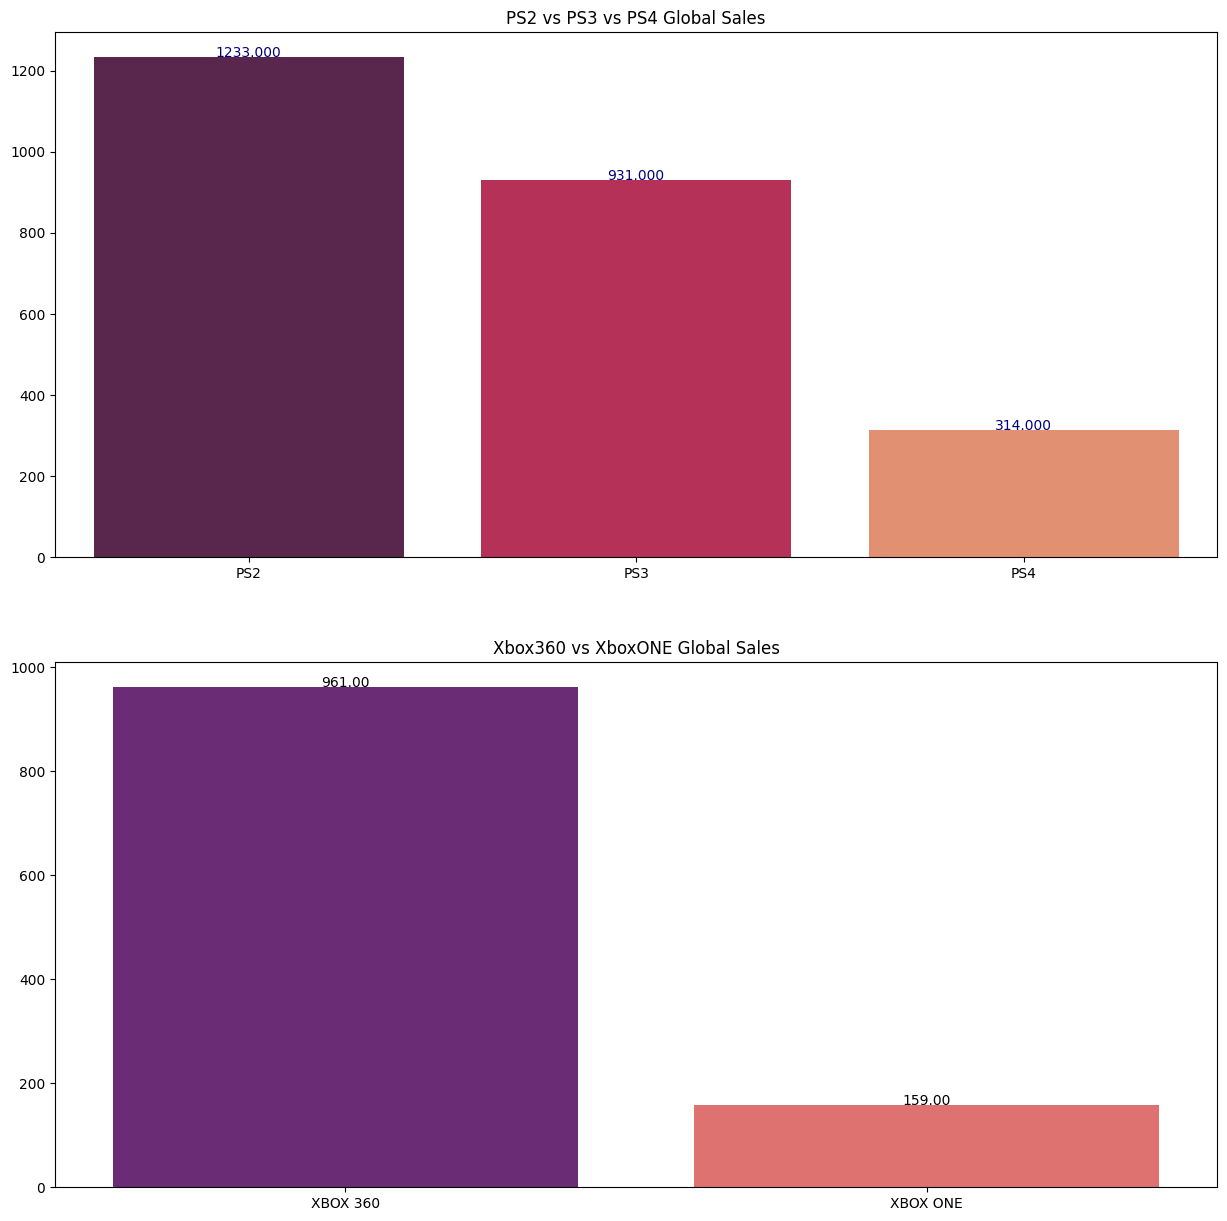

In [53]:
# Creating lists for Sony's global_sales and platforms
stotal_sales = [ps2gs, ps3gs, ps4gs]
splatforms = ['PS2', 'PS3', 'PS4']

# Creating lists for Microsoft's global_sales and platforms
mtotal_sales = [x360gs, xonegs]
mplatforms = ['XBOX 360', 'XBOX ONE']

# Creating subplot
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

# Creating barplot for Sony's platforms
sns.barplot(x=splatforms, y=stotal_sales, palette='rocket', ax=axes[0])
axes[0].set_title('PS2 vs PS3 vs PS4 Global Sales')

# Adding the text labels on Sony's barplot
for index, value in enumerate(stotal_sales):
    axes[0].text(index, value, f'{value:.3f}', color='navy', ha="center")

# Creating barplot for Microsoft's platforms
sns.barplot(x=mplatforms, y=mtotal_sales, palette='magma', ax=axes[1])
axes[1].set_title('Xbox360 vs XboxONE Global Sales')

# Adding the text labels on Microsoft's barplot
for index, value in enumerate(mtotal_sales):
    axes[1].text(index, value, f'{value:.2f}', color='black', ha="center")

plt.show()

Compartion between PS2,PS3 and PS4 and after between Xbox 360 and Xbox One in number of sales

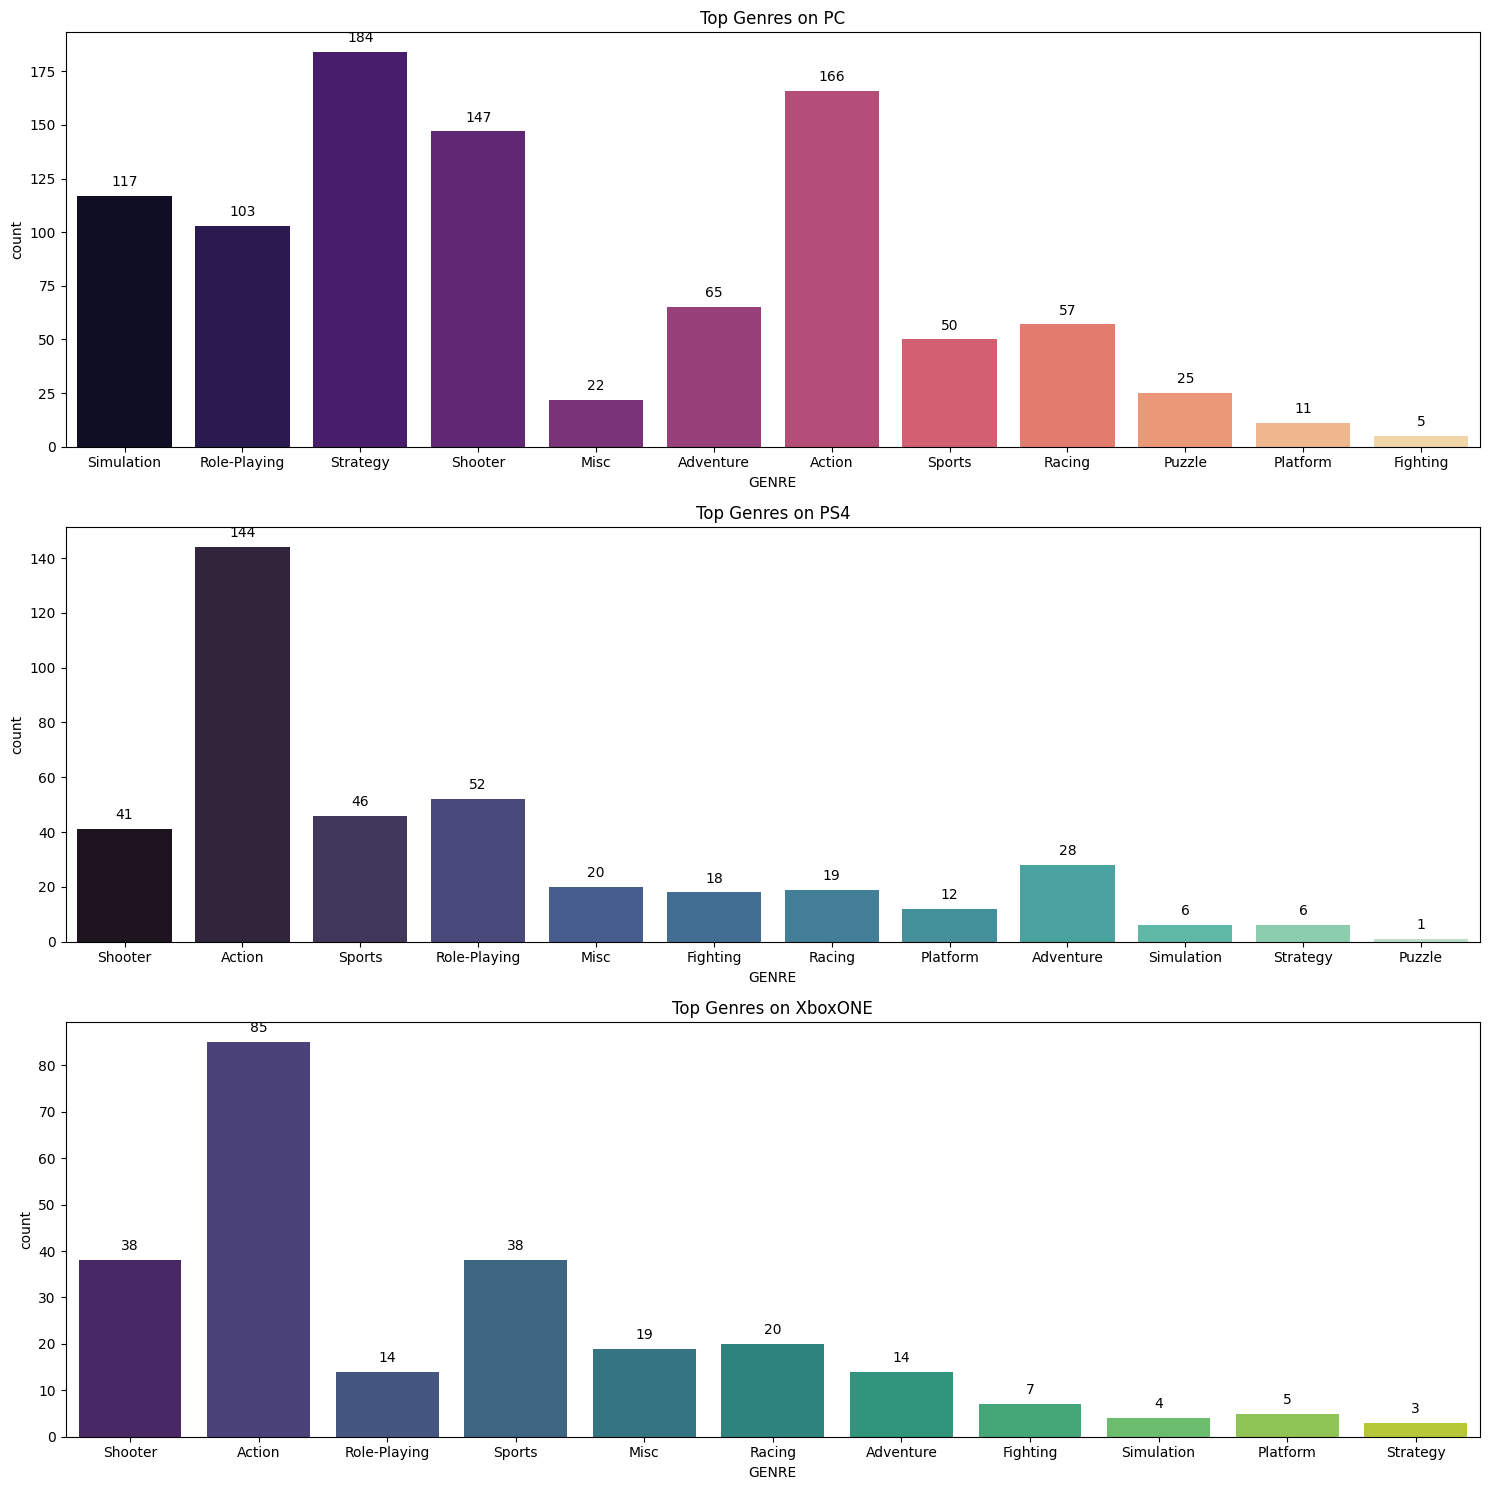

In [77]:
# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Create countplot for PC
sns.countplot(data=pc, x='GENRE', palette='magma', ax=axes[0])
axes[0].set_title('Top Genres on PC')

# Add text labels for PC countplot
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

# Create countplot for Sony
sns.countplot(data=ps4, x='GENRE', palette='mako', ax=axes[1])
axes[1].set_title('Top Genres on PS4')

# Add text labels for Sony countplot
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

# Creating countplot for Microsoft
sns.countplot(data=xOne, x='GENRE', palette='viridis', ax=axes[2])
axes[2].set_title('Top Genres on XboxONE')

# Add text labels for Microsoft countplot
for p in axes[2].patches:
    axes[2].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()

Checking which gender of games have more sales, separated by plataform.

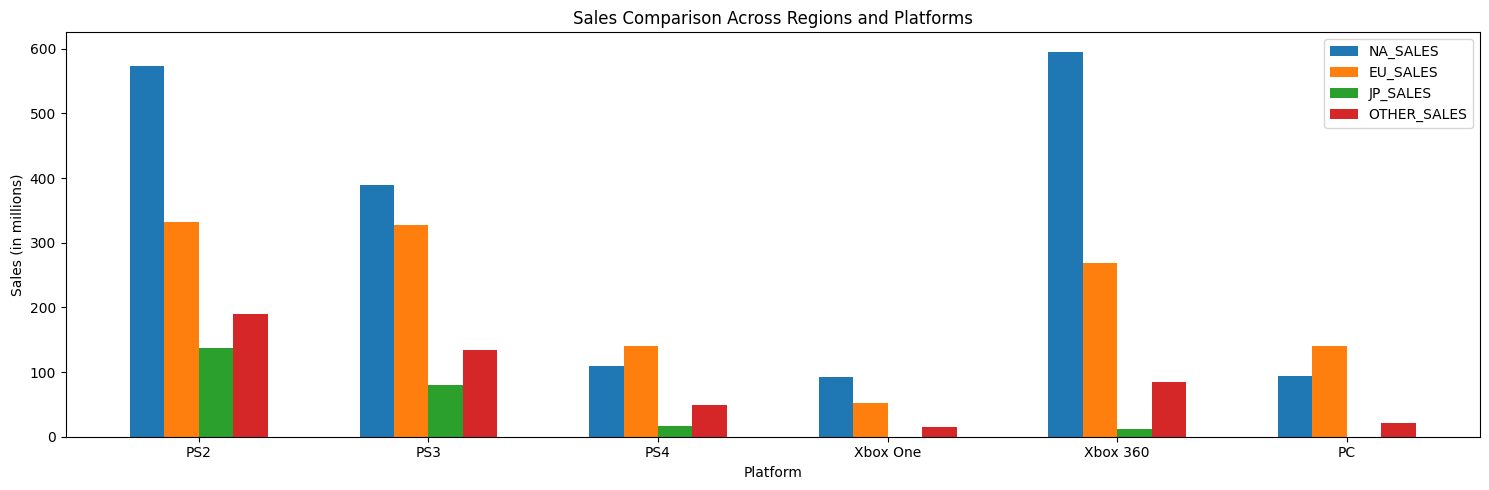

In [31]:
platforms = ['PS2', 'PS3', 'PS4', 'Xbox One', 'Xbox 360', 'PC']
regions = ['NA_SALES', 'EU_SALES', 'JP_SALES', 'OTHER_SALES']

# Sales data for each platform and region
sales_data = {
    'PS2': [ps2[region].sum() for region in regions],
    'PS3': [ps3[region].sum() for region in regions],
    'PS4': [ps4[region].sum() for region in regions],
    'Xbox One': [xOne[region].sum() for region in regions],
    'Xbox 360': [x360[region].sum() for region in regions],
    'PC': [pc[region].sum() for region in regions]
}

# Convert data to numpy array for plotting
sales_array = np.array([[sales_data[platform][i] for platform in platforms] for i in range(len(regions))])

# Plotting the grouped bar chart
plt.figure(figsize=(15, 5))
bar_width = 0.15
index = np.arange(len(platforms))

for i in range(len(regions)):
    plt.bar(index + i * bar_width, sales_array[i], bar_width, label=regions[i])

plt.xlabel('Platform')
plt.ylabel('Sales (in millions)')
plt.title('Sales Comparison Across Regions and Platforms')
plt.xticks(index + bar_width * 1.5, platforms)
plt.legend()
plt.tight_layout()
plt.show()

Checking each region of the world have more sales in each plataform

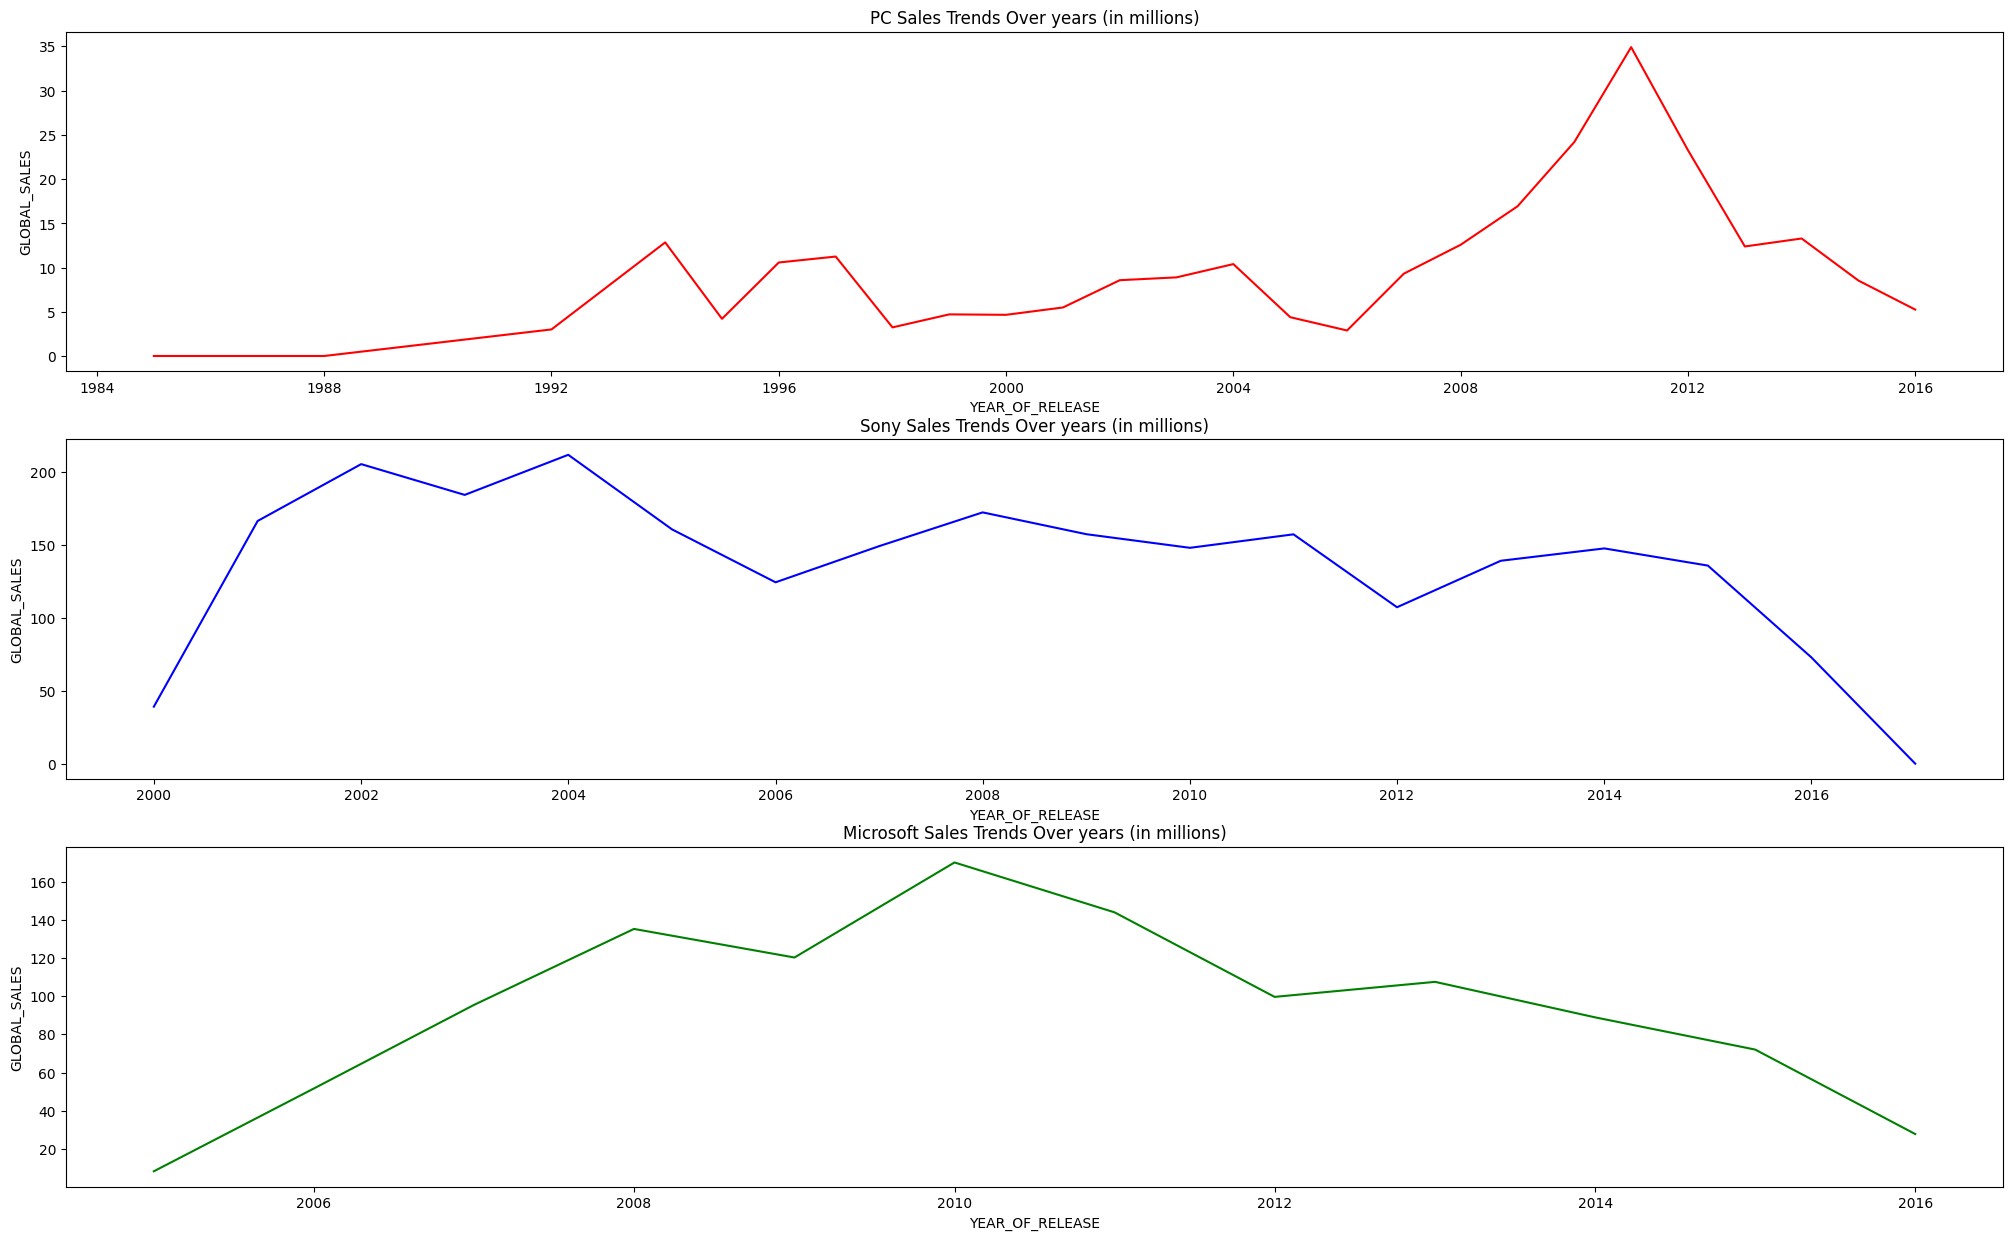

In [32]:
#creating subplot
fig , axes  = plt.subplots(3,1,figsize=(25,15))

#creating lineplot for PC
sns.lineplot(data=pc.groupby('YEAR_OF_RELEASE')['GLOBAL_SALES'].sum(),ax=axes[0],color='red')
axes[0].set_title('PC Sales Trends Over years (in millions)')

#creating lineplot for Sony
sns.lineplot(data=sony.groupby('YEAR_OF_RELEASE')['GLOBAL_SALES'].sum(),ax=axes[1],color='blue')
axes[1].set_title('Sony Sales Trends Over years (in millions)')

#creating lineplot for Microsoft
sns.lineplot(data=microsoft.groupby('YEAR_OF_RELEASE')['GLOBAL_SALES'].sum(),ax=axes[2],color='green')
axes[2].set_title('Microsoft Sales Trends Over years (in millions)')

plt.show()

Graph showing the sale(in million) in each period of year and splitted by plataform

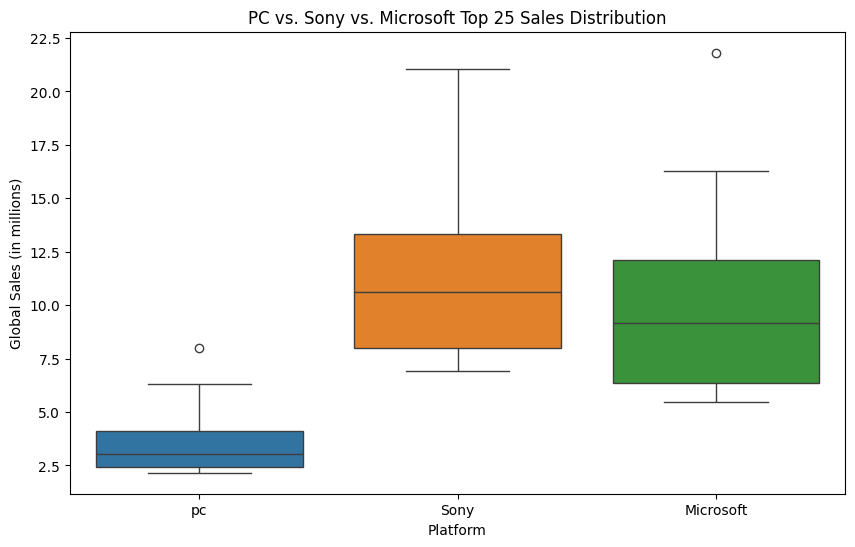

In [33]:
#detrmining top global sales games for pc, sony & microsoft
top_games_pc = pc.nlargest(25, 'GLOBAL_SALES')
top_games_sony = sony.nlargest(25, 'GLOBAL_SALES')
top_games_microsoft = microsoft.nlargest(25, 'GLOBAL_SALES')

# Add a 'Platform' column to each subset indicating the platform
top_games_pc['PLATFORM'] = 'pc'
top_games_sony['PLATFORM'] = 'Sony'
top_games_microsoft['PLATFORM'] = 'Microsoft'

# Combine data
combined_top25 = pd.concat([top_games_pc, top_games_sony, top_games_microsoft])

# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='PLATFORM', y='GLOBAL_SALES', data=combined_top25, hue='PLATFORM')
plt.title('PC vs. Sony vs. Microsoft Top 25 Sales Distribution')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.show()

The top25 sales for each plataform, in million of sales

Text(0.5, 1.0, "Sony's Global Sales Rate")

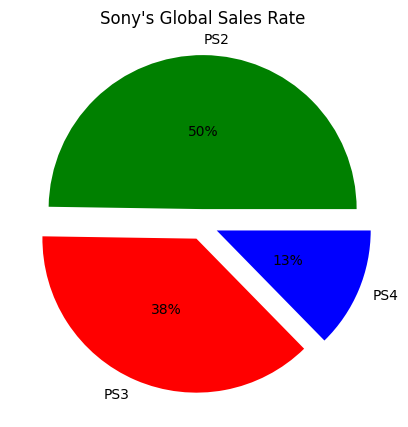

In [34]:
data = [ps2gs,ps3gs,ps4gs]
plt.figure(figsize=(15,5))
plt.pie(data,labels=['PS2','PS3','PS4'],colors=['green','red','blue'],autopct='%.f%%',pctdistance=0.5,explode=[0.1,0.1,0.1])
plt.title("Sony's Global Sales Rate")

Checking the total number of sales for each platform. It may be affected because PS2 was released in 2000, PS3 in 2006 and PS4 in 2013. The period of time that Sony released games for each plataform is related to this. Because addict videogame people tend to migrate for the new generation, but some people buy the previous one when the price drop

Text(0.5, 1.0, "PC's Top Publishers")

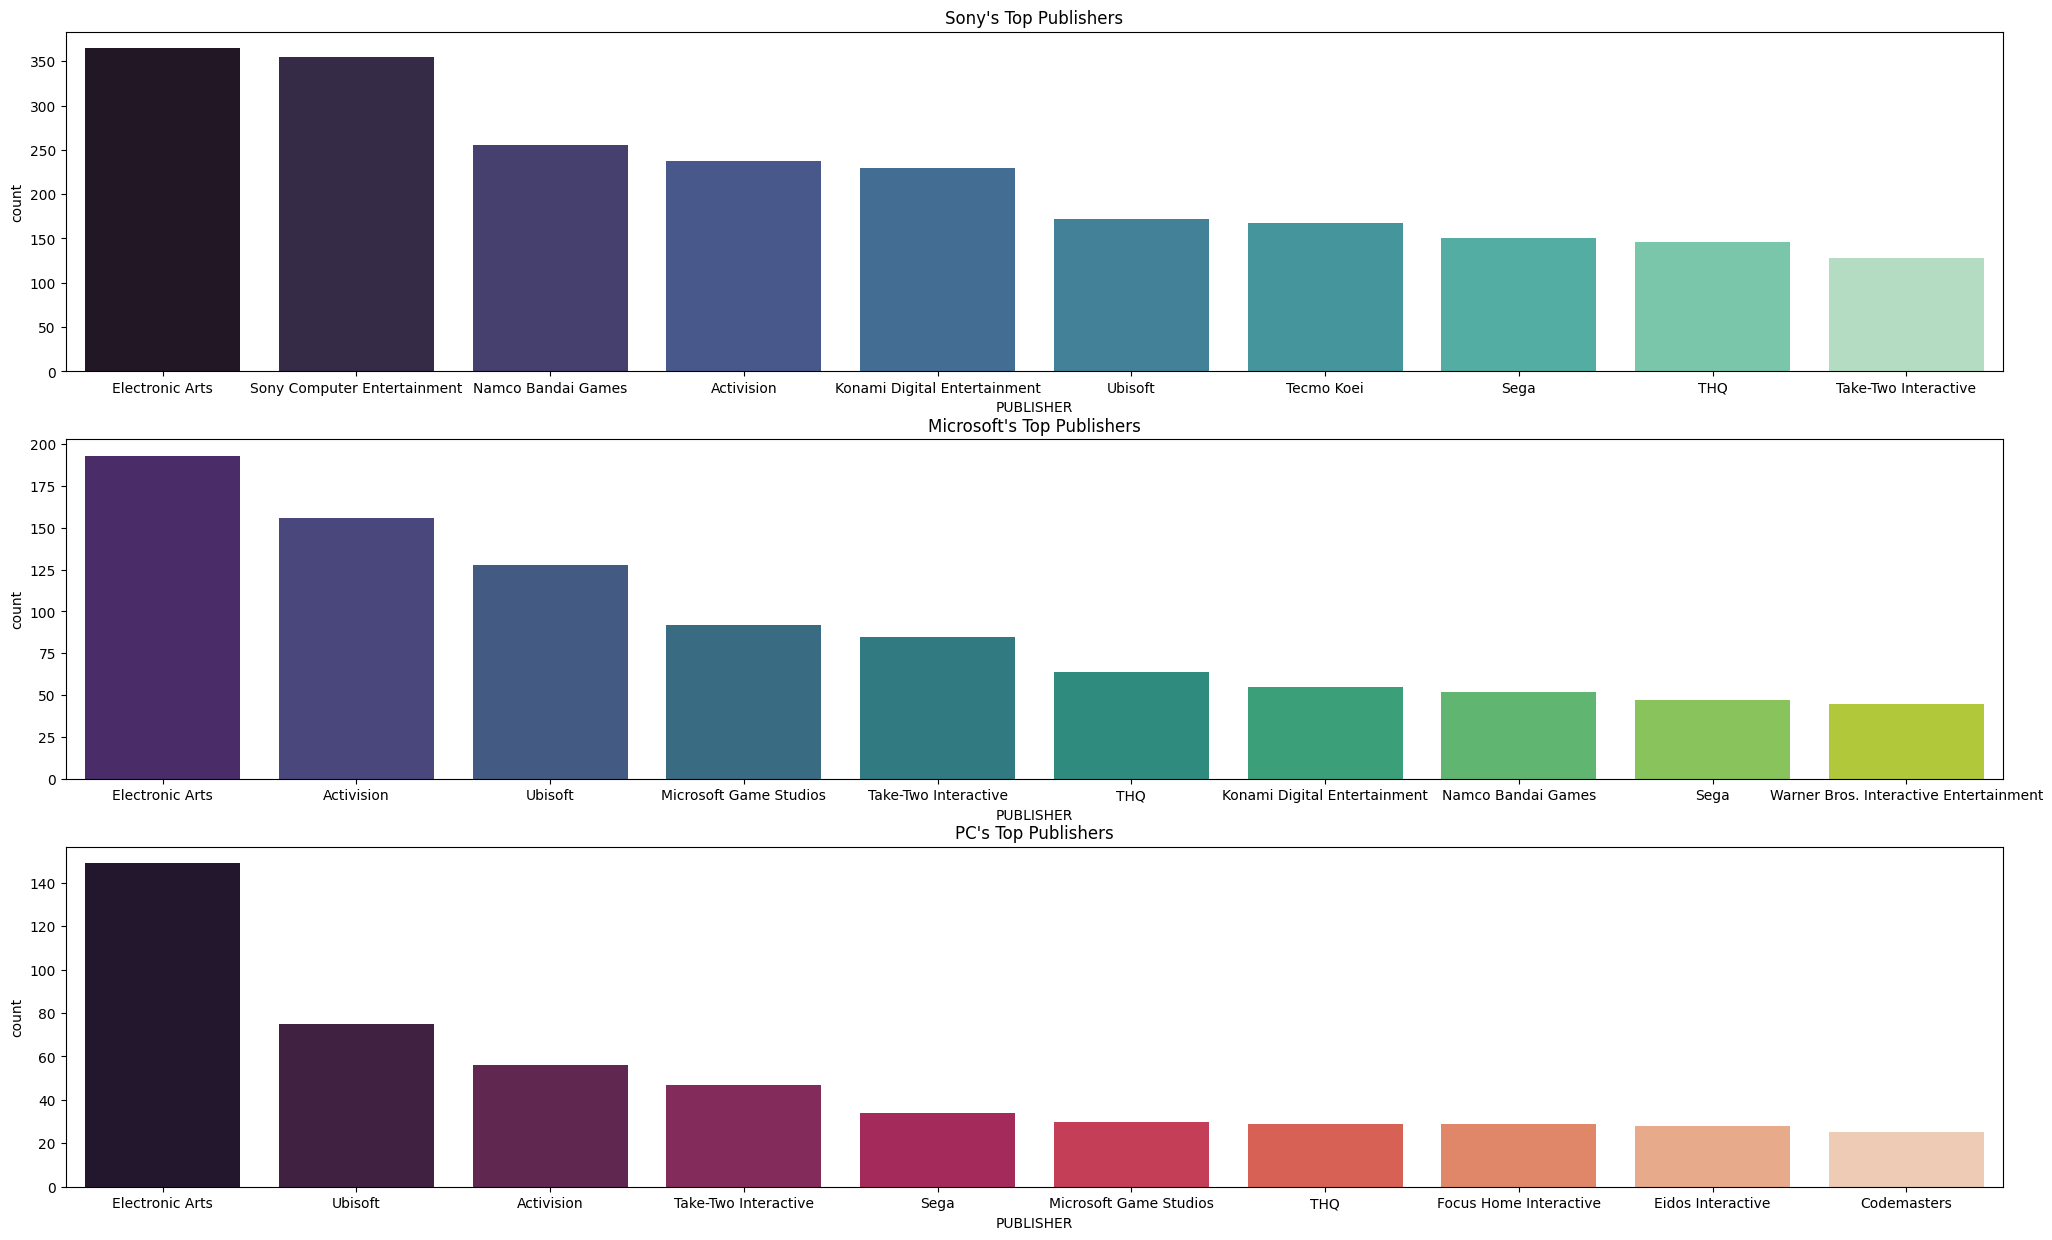

In [35]:
#create a subplot
fig , axes = plt.subplots(3, 1,figsize=(25,15))

# create a countplot for Sony
sns.countplot(data=sony,x='PUBLISHER',order=sony['PUBLISHER'].value_counts().index[:10],palette='mako',ax=axes[0])
axes[0].set_title("Sony's Top Publishers")

# create a countplot for Microsoft
sns.countplot(data=microsoft,x='PUBLISHER',order=microsoft['PUBLISHER'].value_counts().index[:10],palette='viridis',ax=axes[1])
axes[1].set_title("Microsoft's Top Publishers")

# create a countplot for PC
sns.countplot(data=pc,x='PUBLISHER',order=pc['PUBLISHER'].value_counts().index[:10],palette='rocket',ax=axes[2])
axes[2].set_title("PC's Top Publishers")

Checking the top developers for each platform. I can see Eletronic Arts is the most commum for PC Sony and Microsoft, specially because they are who develop football games in general 

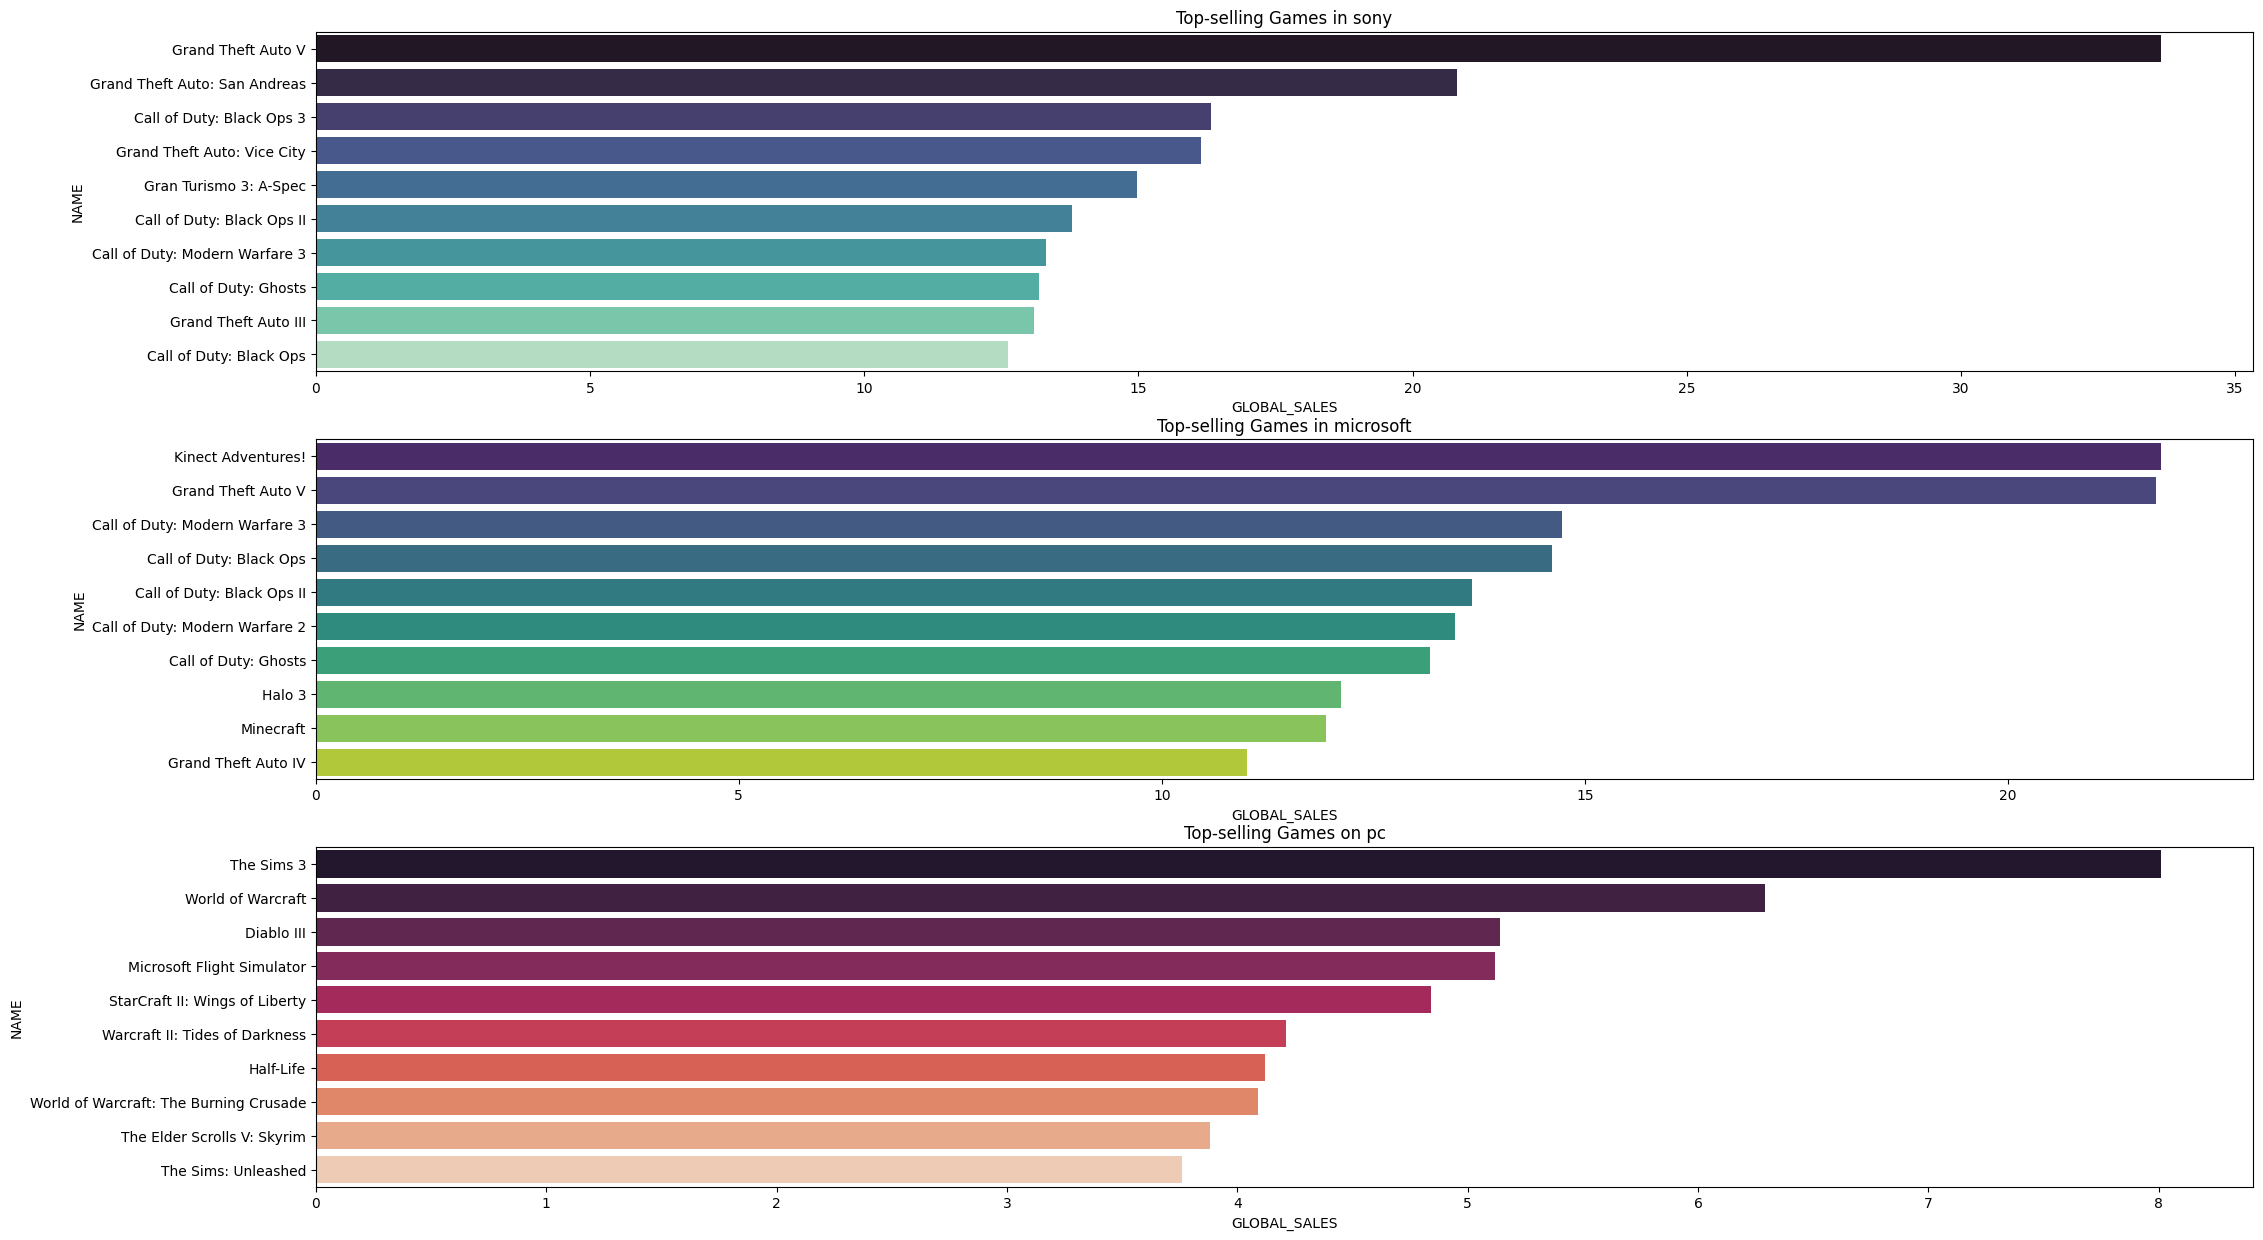

In [36]:
#detrmining pc, sony & microsoft's top games
top_games_sony = sony.groupby('NAME')['GLOBAL_SALES'].sum().sort_values(ascending=False).head(10)
top_games_microsoft = microsoft.groupby('NAME')['GLOBAL_SALES'].sum().sort_values(ascending=False).head(10)
top_games_pc = pc.groupby('NAME')['GLOBAL_SALES'].sum().sort_values(ascending=False).head(10)

#creating a subplot
fig , axes = plt.subplots(3,1,figsize=(25,15))

# creating a barplot for sony
sns.barplot(x=top_games_sony,y=top_games_sony.index,palette='mako',ax=axes[0])
axes[0].set_title('Top-selling Games in sony')

# creating a barplot for microsoft
sns.barplot(x=top_games_microsoft,y=top_games_microsoft.index,palette='viridis',ax=axes[1])
axes[1].set_title('Top-selling Games in microsoft')

# creating a barplot for pc
sns.barplot(x=top_games_pc,y=top_games_pc.index,palette='rocket',ax=axes[2])
axes[2].set_title('Top-selling Games on pc')

plt.show()

Top10 best seller games for each platform. Some games repeat for PS and XBox, but are very different for PC. In the past the focus for PC games were different than nowadays.If we had the data for 2016 until 2023 the games could be different, also, the PC platform have more simulation games, because they the request more machine capacity and people can increase it with easily access to PC if compared to PS and XBox

# TOP GLOBAL SALES

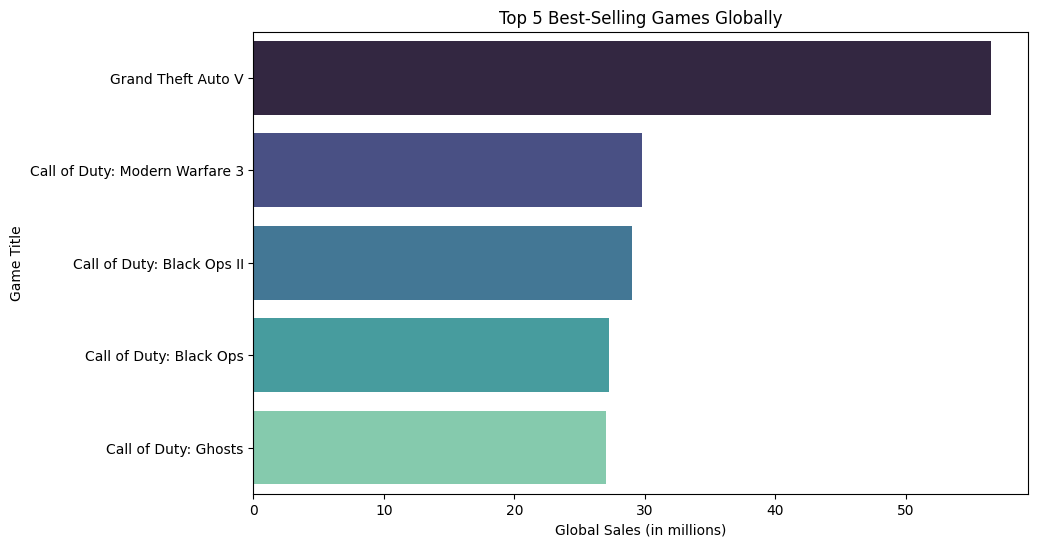

In [37]:
# Combine data from all platforms
all_platforms = pd.concat([sony, microsoft, pc])

# Group by game name and sum global sales
top_games_global = all_platforms.groupby('NAME')['GLOBAL_SALES'].sum().sort_values(ascending=False).head(5)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_games_global.values, y=top_games_global.index, palette='mako')
plt.title('Top 5 Best-Selling Games Globally')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Title')
plt.show()

Checking the global sales, independent of platform, GTA 5 is the top1 with a big difference of more than double for the second, and the game was realased in 2013, the same year as PS4. GTA 5 is the best selling game ever and a completly success, breaking all records inside and outside of the games.

# TOP4 MOST POPULAR GENRES

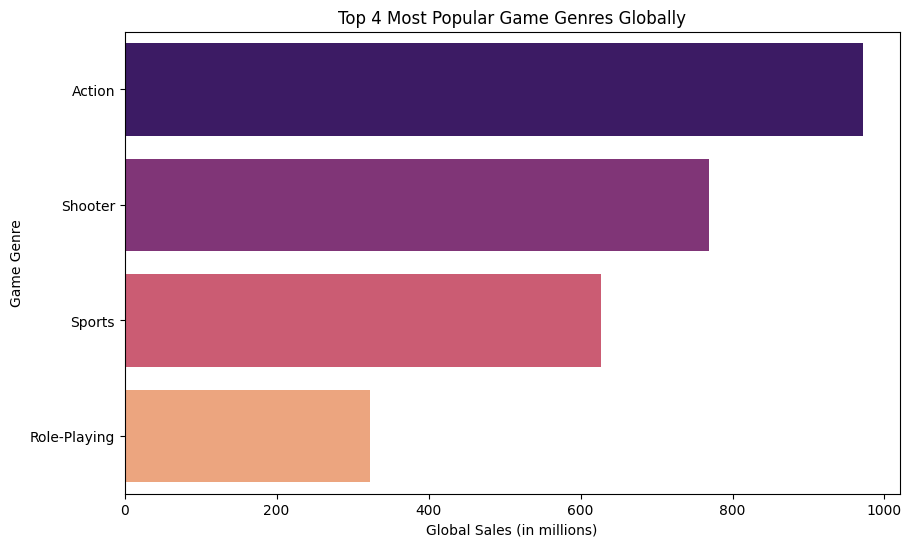

In [38]:
# Combine data from all platforms
all_platforms = pd.concat([sony, microsoft, pc])

# Group by genre and sum global sales
top_genres_global = all_platforms.groupby('GENRE')['GLOBAL_SALES'].sum().sort_values(ascending=False).head(4)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres_global.values, y=top_genres_global.index, palette='magma')
plt.title('Top 4 Most Popular Game Genres Globally')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Genre')
plt.show()

The top 4 most popular genres showing Action games are the leader by more than 200 million sale over the second genre. These number is very high because this gender covers many games top of class, like GTA 5 and all the GTA series, the other genres are more specific in terms of games type, like shotter/sports where I can easly see what they are about, and role playing games are more RPG games, something very popular too. But the top2 until top4 are a nich of genres, so that is different than the top1 Action includes many different games

# CORRELATION NA_SALES AND JP_SALES 2010-2014

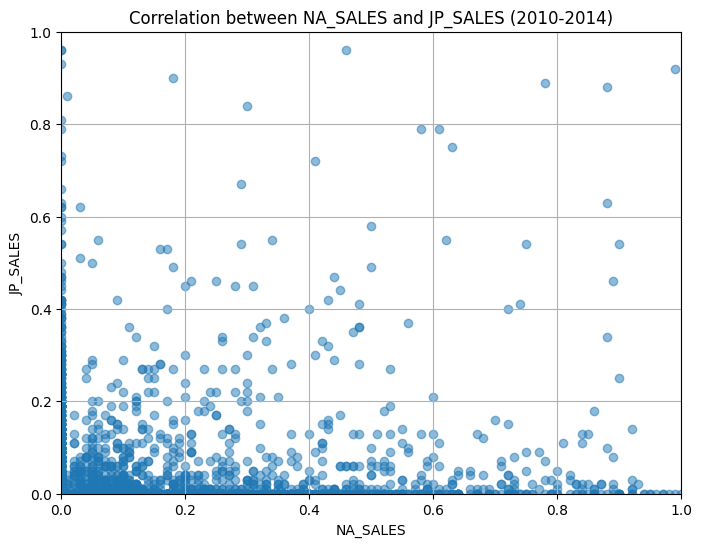

Pearson Correlation Coefficient: 0.26035708726320705


In [39]:
# Filter data for the years 2010 to 2014
filtered_df = df[(df['YEAR_OF_RELEASE'].dt.year >= 2010) & (df['YEAR_OF_RELEASE'].dt.year <= 2014)]

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['NA_SALES'], filtered_df['JP_SALES'], alpha=0.5)
plt.title('Correlation between NA_SALES and JP_SALES (2010-2014)')
plt.xlabel('NA_SALES')
plt.ylabel('JP_SALES')
plt.xlim(0, 1)  # Set x-axis limits
plt.ylim(0, 1)   # Set y-axis limits
plt.grid(True)
plt.show()

# Calculate the Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(filtered_df['NA_SALES'], filtered_df['JP_SALES'])

# Display the correlation coefficient
print("Pearson Correlation Coefficient:", correlation_coefficient)


Most of the data points are close to the origin of the graph, it indicates both sales number are low. The high sales are less com,on in both regions. They dont have a linear relatiopship, showing as per a lack of clear diagonal pattern that would suggest that increase in NA Sales are matched by increases at JP Sales. In this correlation dont have many outliers, what indicates some specific game that was exceptionally well received in one market but not in the other one. The correlation efficient cant be determinated just looking the graph, because the pattern dont have a strong positive lienar correlation.

# GAMES SALES BEFORE AND AFTER 2005 IN EU SALES

Mean EU_SALES for older games (2005 and earlier): 0.1481682273698045
Mean EU_SALES for newer games (after 2005): 0.14477587375350956
Older games have a higher mean EU_SALES than newer games.


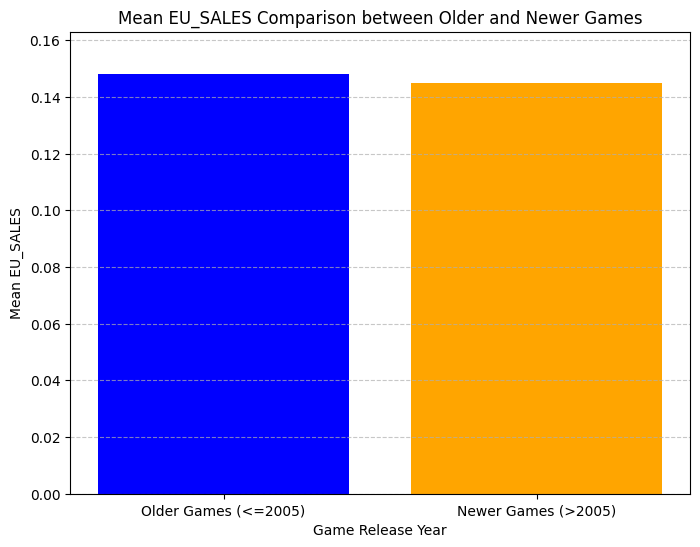

In [40]:
# Filter data for older games (2005 and earlier)
older_games = df[df['YEAR_OF_RELEASE'].dt.year <= 2005]

# Filter data for newer games (after 2005)
newer_games = df[df['YEAR_OF_RELEASE'].dt.year > 2005]

# Calculate the mean "EU_SALES" for older games
mean_eu_sales_older = older_games['EU_SALES'].mean()

# Calculate the mean "EU_SALES" for newer games
mean_eu_sales_newer = newer_games['EU_SALES'].mean()

# Print the mean "EU_SALES" for older and newer games
print("Mean EU_SALES for older games (2005 and earlier):", mean_eu_sales_older)
print("Mean EU_SALES for newer games (after 2005):", mean_eu_sales_newer)

# Compare means to determine if older games have a higher mean "EU_SALES" than newer games
if mean_eu_sales_older > mean_eu_sales_newer:
    print("Older games have a higher mean EU_SALES than newer games.")
elif mean_eu_sales_older < mean_eu_sales_newer:
    print("Newer games have a higher mean EU_SALES than older games.")
else:
    print("Mean EU_SALES are equal for older and newer games.")
    
# Mean EU_SALES data
mean_sales = [mean_eu_sales_older, mean_eu_sales_newer]

# Labels for the bars
labels = ['Older Games (<=2005)', 'Newer Games (>2005)']

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, mean_sales, color=['blue', 'orange'])
plt.title('Mean EU_SALES Comparison between Older and Newer Games')
plt.xlabel('Game Release Year')
plt.ylabel('Mean EU_SALES')
plt.ylim(0, max(mean_sales) * 1.1)  # Set y-axis limit slightly above the maximum mean sales
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Comparing both graphs we can see Older games(before 2005) have higher mean if compared to newer games(after 2005) in Europe. This have some reasons to happen, but one of the reasons is the sales before 2005 started at 80's and last for 25 years, and the games after 2005 have only 10 years of sales recorded. It can be one of the reasons for this higher means before 2005. One other reason is because the video game players were more widespread nowadays, with more access to content about it, reviews about games and consoles etc

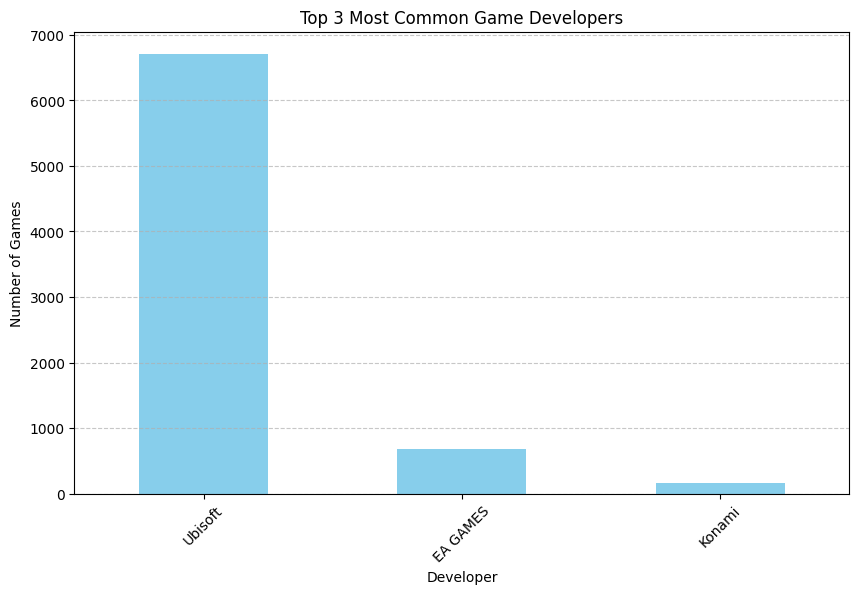

In [46]:
# Drop duplicate games based on both 'GAME' and 'PLATFORM' for Ubisoft
unique_ubisoft_df = df[df['DEVELOPER'].str.contains('Ubisoft', case=False)].drop_duplicates(subset=['NAME', 'PLATFORM'])

# Merge all variations of "EA" and "Electronic Arts" into a single category named "EA GAMES"
df['DEVELOPER'] = df['DEVELOPER'].replace({'EA': 'EA GAMES', 'EA Canada': 'EA GAMES', 'EA Vancouver': 'EA GAMES', 'EA Sports': 'EA GAMES', 'EA Sports Big': 'EA GAMES', 'EA Tiburon': 'EA GAMES', 'EA Redwood Shores': 'EA GAMES', 'EA LA': 'EA GAMES', 'EA Bright Light': 'EA GAMES', 'EA DICE': 'EA GAMES', 'EA Montreal': 'EA GAMES', 'EA Phenomic': 'EA GAMES', 'EA Salt Lake': 'EA GAMES', 'EA Seattle': 'EA GAMES', 'EA Chicago': 'EA GAMES', 'EA Games': 'EA GAMES', 'Electronic Arts': 'EA GAMES', 'Electronic Arts, EA Redwood Shores': 'EA GAMES', 'Electronic Arts, Rebellion': 'EA GAMES'})

# Count occurrences of each game developer
developer_counts = df['DEVELOPER'].value_counts()

# Select the top 3 most common game developers
top3_developers = developer_counts.head(3)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top3_developers.plot(kind='bar', color='skyblue')
plt.title('Top 3 Most Common Game Developers')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# PART 2

Correlation between USER_SCORE and GLOBAL_SALES: 0.08787896414075597


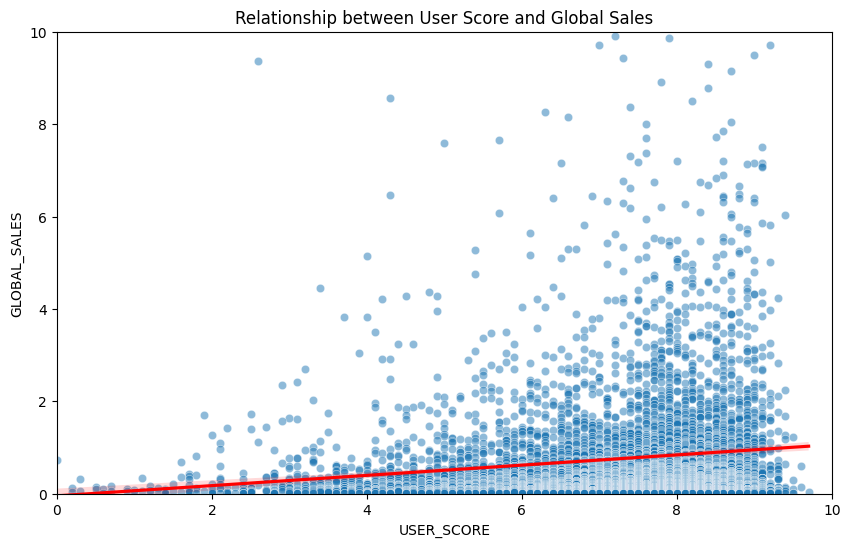

In [45]:
# Assuming df has been defined and 'USER_SCORE' has been converted to numeric
df['USER_SCORE'] = pd.to_numeric(df['USER_SCORE'], errors='coerce')

# Calculate the correlation between 'USER_SCORE' and 'GLOBAL_SALES'
correlation = df['USER_SCORE'].corr(df['GLOBAL_SALES'])

# Print the correlation coefficient
print("Correlation between USER_SCORE and GLOBAL_SALES:", correlation)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='USER_SCORE', y='GLOBAL_SALES', alpha=0.5)
plt.title('Relationship between User Score and Global Sales')
plt.xlabel('USer Score')
plt.ylabel('Global Sales (Millions)')

# Adding a line of best fit
sns.regplot(data=df, x='USER_SCORE', y='GLOBAL_SALES', scatter=False, color='red')

plt.xlim(0, 10)  # Set x-axis limits for 'USER_SCORE' from 0 to 10
plt.ylim(0, 10)  # Set y-axis limits for 'GLOBAL_SALES' from 0 to 20 (assuming millions)

plt.show()

Analysing the graph, I can see the density of points are at the lower end, suggesting greataer number of games have lower sales figures. the User_Score is fairly spread, indicating wide range of scores to the games.The red line show a slight positive slope, indicating a positive correlation, but it is not a strong correlation. The variance in 'Global Sales' appears to increase as the User Score increases. This means that higher-rated games by users vary more widely in their global sales success.

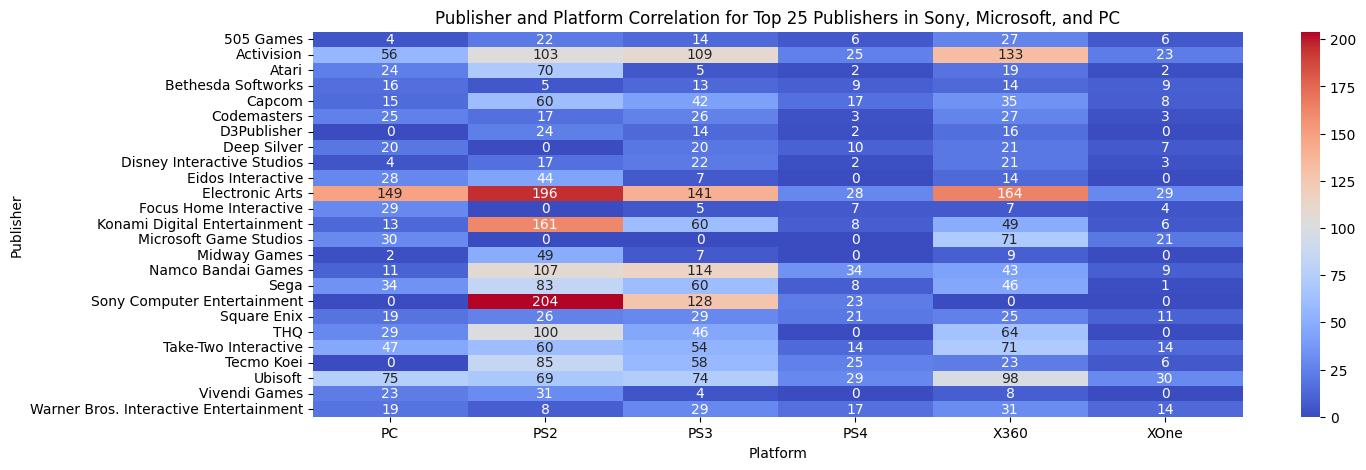

In [78]:
#combining data
combined_data = pd.concat([sony[['PUBLISHER','PLATFORM']],microsoft[['PUBLISHER','PLATFORM']],pc[['PUBLISHER','PLATFORM']]])

#determining top publishers
top_publishers = combined_data['PUBLISHER'].value_counts().nlargest(25).index

combined_data_top_25 = combined_data[combined_data['PUBLISHER'].isin(top_publishers)]

cross_tab = pd.crosstab(combined_data_top_25['PUBLISHER'], combined_data_top_25['PLATFORM'])
#creating heatmap for the correlation
plt.figure(figsize=(15,5))
sns.heatmap(cross_tab, cmap='coolwarm', annot=True, fmt='d')
plt.title('Publisher and Platform Correlation for Top 25 Publishers in Sony, Microsoft, and PC')
plt.xlabel('Platform')
plt.ylabel('Publisher')



plt.show()

This correlation show publisher vs platform, showing in each cell the quantity of games released by a publisher for those platform. When it is blue means lower number of games for the correspondent platform. When it red, it means more games for those platform. The high number of games are from EA to PS2 and XBOX 360, indicating 196 and 164 games for each platform respectively. 

# PART 3